In [26]:
import tensorflow as tf

In [27]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [28]:
#Checking the type of dataset
type(data)              #Bunch is similar to dictionaries
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [29]:
#Checking the Data's size in the dictionary
data.data.shape

(569, 30)

In [30]:
data.target #targets are 0 and 1's - thier corresponding names are in target_names
data.target.shape  # 1-D

(569,)

In [31]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
#Splitting the data into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train ,Y_test = train_test_split(data.data , data.target , test_size = 0.3)
N , D = X_train.shape

In [33]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [34]:
#Biuld the Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

#Train the model
r = model.fit(X_train,Y_train,validation_data = (X_test , Y_test) , epochs = 100)

print("Train Score : ",model.evaluate(X_train,Y_train))
print("Test  Score : ",model.evaluate(X_test,Y_test))

Epoch 1/100
13/13 [==============================] - 0s 10ms/step - loss: 0.8575 - accuracy: 0.4724 - val_loss: 0.8363 - val_accuracy: 0.5380
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7755 - accuracy: 0.5578 - val_loss: 0.7449 - val_accuracy: 0.6140
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.6156 - val_loss: 0.6679 - val_accuracy: 0.6667
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6884 - val_loss: 0.6021 - val_accuracy: 0.7251
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.7362 - val_loss: 0.5494 - val_accuracy: 0.7778
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5459 - accuracy: 0.7688 - val_loss: 0.5050 - val_accuracy: 0.7953
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.7889 - val_loss: 0.4677 - val_accuracy: 0.8129
Epoch 8/100


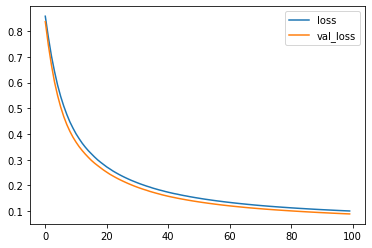

In [35]:
#Plotting Loss , Validation Loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'] , label = 'loss')
plt.plot(r.history['val_loss'] , label = 'val_loss')
plt.legend()

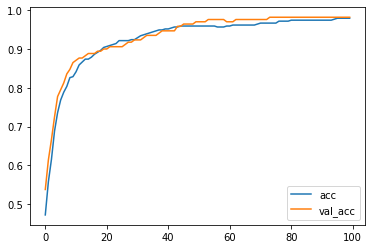

In [36]:
plt.plot(r.history['accuracy'] , label = 'acc')
plt.plot(r.history['val_accuracy'] , label = 'val_acc')
plt.legend()

## **Predictions**

In [37]:
P = model.predict(X_test)
print(P)                        #Output of the sigmoid , probabilites P(y=1|X)

[[9.97880578e-01]
 [3.36594167e-06]
 [9.73618388e-01]
 [9.82858181e-01]
 [7.72742867e-01]
 [9.89193559e-01]
 [9.11924601e-01]
 [8.36642742e-01]
 [9.05483842e-01]
 [9.84706759e-01]
 [5.23954630e-04]
 [9.86210227e-01]
 [1.67063763e-06]
 [9.56427991e-01]
 [4.42782096e-11]
 [9.89581823e-01]
 [1.28170252e-02]
 [1.31335258e-02]
 [8.12521338e-01]
 [9.78177845e-01]
 [6.42029047e-02]
 [6.65442567e-05]
 [2.42948532e-04]
 [8.02885532e-01]
 [9.92231488e-01]
 [9.69892681e-01]
 [6.49577796e-01]
 [9.73450124e-01]
 [6.22747302e-01]
 [9.86964464e-01]
 [6.76475465e-02]
 [9.71541286e-01]
 [9.93865013e-01]
 [1.91450119e-04]
 [9.79605913e-01]
 [4.24414873e-04]
 [7.41246343e-03]
 [9.82146144e-01]
 [8.36247206e-03]
 [2.93000710e-07]
 [6.00965142e-01]
 [3.83178383e-01]
 [2.21286118e-02]
 [7.05281496e-01]
 [9.99054551e-01]
 [9.88791049e-01]
 [9.83534098e-01]
 [9.84543145e-01]
 [9.89228010e-01]
 [9.87634599e-01]
 [8.48230720e-03]
 [4.67712164e-01]
 [3.13885212e-02]
 [6.66664422e-01]
 [4.20305405e-05]
 [9.737044

In [38]:
import numpy as np
P = np.round(P).flatten()  #Pushing them into 1/0

In [40]:
#Manual Calculation of accuracy and comparing with models calculation
print("Manually calculated Accuracy : ",np.mean(P == Y_test))
print("Evaluation output           : ",model.evaluate(X_test,Y_test))

Manually calculated Accuracy :  0.9824561403508771
6/6 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9825
Evvaluation output           :  [0.08926159888505936, 0.9824561476707458]
